<img src="images/pca_banner.png" width="2000"/>

# Principal Component Analysis.
#### This is the first of a series of Jupyter notebooks where we will explore the topic of Principal Component Analysis (PCA) and establish some broader understanding with respect to Singular Value Decomposition (SVD). We will begin by approaching the topic from general terminology, then we will use images to observe the computations at work, and slowly progress deeper towards more foundational concepts. My aim is to get everyone acquainted with the principals of PCA using some useful visual examples which I think will help to develop some intuition with respect to PCA and SVD. We will make use of some very useful Python libraries which we can use off-the-shelf, but my hope is to be able to provide some deeper understanding of what these "off-the shelf" functions actually are doing under the hood.

So, let's get started....

## 1. What is Principal Component Analysis (PCA)?
**A method to summarize datasets.** PCA is a mathematical technique that enables extracting the main features of a dataset thereby reducing its size while preserving the most relevant information. This reduction in size is often referred to as **"dimensionality reduction"** and the features that define the dataset are thereby reduced to what it is called **principal components**, or PCs - for short!.

A useful analogy is to think of a PCA as a method to "summarize" a dataset. A summary is often thought as a very short text that captures the essence of a much larger one. Likewise, the aim of PCA is to "distill" a large dataset into a set of PCs that preserve the important aspects of the original dataset, and to discard the less relevant ones. Along the lines of our "summary" analogy, each PC works like a sentence in a summary: the more sentences we use (i.e., the more PCs we extract from the analysis), the higher the detail with which we summarize the original text (i.e. the dataset).

## 2. Why does PCA matters?
The analysis of principal components is an important tool in data science because it allows the downstream analysis to focus and the dominant patterns in the data, instead of getting lost in details which, while being part of the information domain, may be irrelevant to explain behavior, phenomena, or whatever problem we may be trying to solve. In a way we do a sort of PCA in our ow brain without even realizing it. For example, [instead of reading every single letter the way we actually read is by hopping through a piece of text](https://collegeinfogeek.com/speed-reading-science/). Also, the way [we recognize faces tends to focus on details of a face instead of consuming all the information presented in a face with equal relevance](https://en.wikipedia.org/wiki/Face_perception). We appear to have evolved in a manner where we selectively subsample the information that is presented to us, and process that subsampled version of reality. In doing so, extracting patterns from what our senses tell us is crucial not only to quickly come to a resolution of what needs to happen next, but importantly, we have to do it in a correct way that promotes our survival as individuals. 

In data science, developing models that get too busy with the details of the data can lead to **Overfitting**, a big problem whereby a model that may perform very well on trained data, may perform very poorly on unseen data. This happens when the model fails to see the genral trends and patterns and gets hooked on the details present at the time of training.

## 3. What is a Principal Component?
First off, it is important to be clear that when we talk of *principal components* we do not refer to a set of specific main features found in the original dataset. Instead, PCs are entire new entities in themselves that reflect the contribution of multiple features across the entire dataset. However, these different features will share some degree of similarity in that they will fluctuate similarly across the dataset - you can say they will co-vary. For example, a dataset may contain features that are redundant, such as price in two different currencies, or distances in different units, or may be highly correlated such as price of a given purchased car and the income of the buyer. In those cases, it can make sense to "summarize" those features into a single new feature: a "principal component".

Yet another way to think of PCs is again to think of patterns. A pattern is a repeating element that occurs at a given frequency over some information landscape (text, image, sound... or a dataset). Unique information is contained only in the base element (or "unit cell") of the pattern - patterning is then simply the process of repeating that unique element of information (eventually with some symmetry operations to spice things up). Instead of capturing the entirety of the pattern, it can be efficient and useful to capture information regarding the unit cell.

## 4. PCA in action

One popular application of PCA is in image compression. So by using a panel of images we can begin to develop some intuition with respect to what PCA does, how it processes data, and this will be useful later on once we begin using datasets.

### 4.1 Image compression - Part I.

Let us begin by acknowledging that an image is nothing more, and nothing else, than a matrix. Also, from an informational standpoint, spreadsheet tables filled with numbers along rows and columns are, like 2D images, indistinguishable from matrices. So, keeping this in mind, we know that we can define a 2D matrix as the 2D array of elements of size *m x n*. Now let us pause for a moment to realize that by defining two sets of numbers we actually are defining far fewer elements than the ones required to fill the matrix. For example, if we take two sets of 7 numbers, i.e. 14 elements, we actually end up defining 49 elements of the matrix. In order words, we saved space by encoding the information of a matrix as part of a multiplication of two sets of numbers. 

Let's try this:

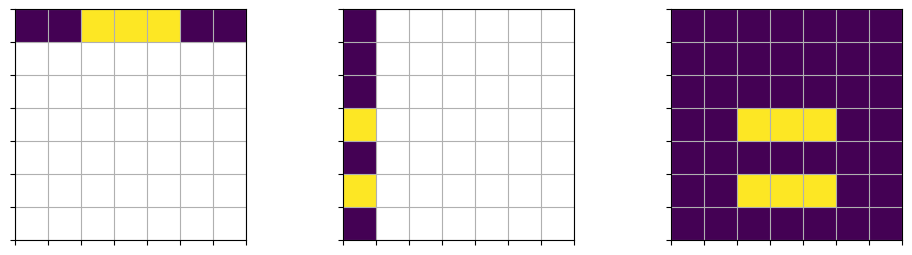

In [68]:
import numpy as np
import matplotlib.pyplot as plt
m = np.matrix([[0,0,1,1,1,0,0]]) # row (MATRIX)
n = np.matrix([[0],[0],[0],[1],[0],[1],[0]]) # column (Vector)
mxn = np.multiply(m,n)
img_lst = [m, n, mxn]

fig = plt.figure(figsize=(12, 3))

for i, img in enumerate(img_lst):
    ax = fig.add_subplot(1, len(img_lst), i+1)
    ax.imshow(img)  
    ax.set_xticks(np.arange(-0.5,7,1), labels=[])
    ax.set_yticks(np.arange(-0.5,7,1), labels=[])
    ax.grid(True, which='major')


In [20]:
mx = np.matrix([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    ])

memory_usage = mx.shape[0] * mx.shape[1] * 4

In [34]:
mx = mx.astype(np.uint8)
mx.dtype

dtype('uint8')

In [35]:
mx

matrix([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

Let us now also acknowledge that the image above that takes 36 numbers to define, we implemented it using much less information, only 12 numbers (6 from the)

### 3.1 Image compression - Part II
Let's explore this topic by looking at two sets of examples of binary images named "**cross**" and "**robot**". While we work with these images, it is perhaps also useful to keep in mind that images are matrices, and datasets are also matrices. 

The images we will look at are:
- **cross-v1** - a simple image with a cross pattern, and is symmetric about the central vertical and horizontal axes.
- **cross-v2** - developed by breaking one of the axis of symmetry of *cross-v1*, but where symmetry is retained about the central vertical axis.
- **robot-v1** - a more complex image with a face of a robot symmetrical about its central vertical axis.
- **robot-v2** - developed by breaking the only axis of symmetry of *robot-v1* creating an asymmetric image.

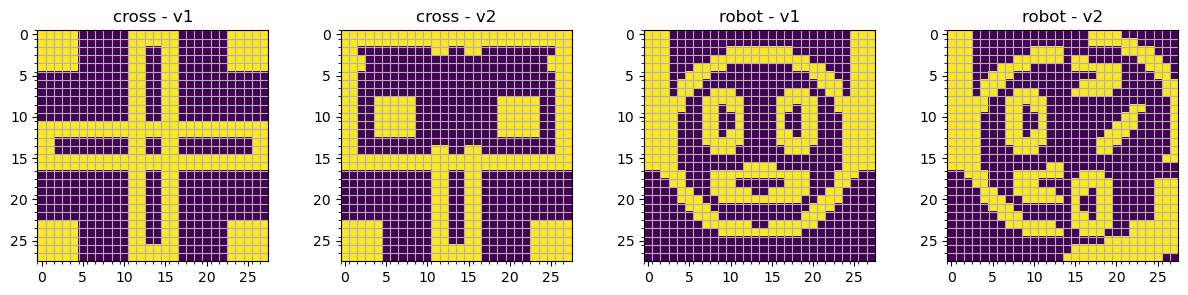

In [45]:
# Display "cross" and "robot" sample images in their -v1 and -v2 variants
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
img_cross1 = io.imread('images/cross_28x28px_bin.png').astype(np.uint8)
img_cross2 = io.imread('images/cross2_28x28px_bin.png').astype(np.uint8)
img_robot1 = io.imread('images/robot_28x28px_bin.png').astype(np.uint8)
img_robot2 = io.imread('images/robot2_28x28px_bin.png').astype(np.uint8)

img_lst = [img_cross1, img_cross2, img_robot1, img_robot2]
legend_lst = ["cross - v1", "cross - v2", "robot - v1", "robot - v2"]

fig, axes = plt.subplots(1,4,figsize=(15,3))
ax = axes.ravel()
plot_lst = [img_cross1, img_cross2, img_robot1, img_robot2]

for i, img in enumerate(img_lst):    
    # Major ticks
    ax[i].set_xticks(np.arange(0, 27, 5))
    ax[i].set_yticks(np.arange(0, 27, 5))
    # Labels for major ticks
    ax[i].set_xticklabels(np.arange(0, 27, 5))
    ax[i].set_yticklabels(np.arange(0, 27, 5))
    # Minor ticks
    ax[i].set_xticks(np.arange(-.5, 27.5, 1), minor=True)
    ax[i].set_yticks(np.arange(-.5, 27.5, 1), minor=True)
    # Set grid
    ax[i].grid(True, which='minor')  
    # Set title  
    ax[i].set_title(legend_lst[i])
    # Plot array
    ax[i].imshow(img)


Before we begin analyzing these images, let's get straight about what they all have in common:

In [46]:
# Shared properties of the images to be analyzed
import sys
from tabulate import tabulate

def image_properties(img_name):
    """collects and displays some properties of the indicated image name.

    Args:
        img_name (numpy.ndarray): 2D image array to for which properties are extracted
    """
    size = img_name.size # total number of pixels
    mem = sys.getsizeof(img_name) # Memory
    shape = img_name.shape # Dimensions
    vals = list(np.unique(img_name, return_counts=True)[0]) # Unique values
    counts = list(np.unique(img_name, return_counts=True)[1]) # Counts of unique values
    
    return [size, shape, vals, counts[0], counts[1], mem]


properties_lst =[]
for i, img in enumerate(img_lst):
    temp_lst = [legend_lst[i]] + image_properties(img)
    properties_lst.append(temp_lst)

headers = ["image", "nr pixels", "matrix size", "unique values", "total 0", "total 1","memory size"]
print(tabulate(properties_lst, headers = headers))
    
    

image         nr pixels  matrix size    unique values      total 0    total 1    memory size
----------  -----------  -------------  ---------------  ---------  ---------  -------------
cross - v1          784  (28, 28)       [0, 1]                 460        324            912
cross - v2          784  (28, 28)       [0, 1]                 460        324            912
robot - v1          784  (28, 28)       [0, 1]                 460        324            912
robot - v2          784  (28, 28)       [0, 1]                 460        324            912


Despite their different look, each image comprises 784 pixels, arranged as a 28x28 matrix, consisting of only of numbers 0 and 1, all with the same amount of zeros (460) and the same amount of ones (324), and for each image the same amount of memory is used: 912 bytes. From this perspective one could argue that all 4 images hold the same amount of information.

**However, these numbers don't tell the whole story.** A key difference between these images in terms of information content is how symmetric the information on display is. Whenever information can be described by a pattern repeated multiple times (in other words, whenever information is correlated), it offers the possibility to be well summarized by a single principal component. The more repetitive the underlying pattern in an image, the more that full pattern can be summarized. In other words, the more repetitive is the information in a matrix, the smaller the number of principal components required to fully describe it.

To investigate how these different images which are so similar in so many other aspects, can actually differ in terms of their principal components, we will be using [Scikit-Learn's PCA function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

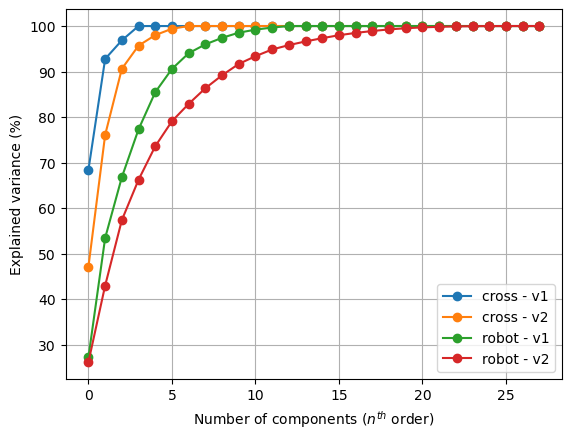

In [5]:
# Display plot with the cummulative sum of the explained varience for each principal component. 
from sklearn.decomposition import PCA
def pca_cumsum (array2d, nr_c):
    """Makes the principal component analysis of a 2D array and returns a vector containing
    the cummulative sum of the explained variance for each principal component.

    Args:
        array2d (numpy.ndarray): 2D array fro which the principal components are calculated
        nr_c (int): number of components
    """
    # Initialize PCA for the desired number of components:
    pca = PCA(n_components = nr_c)
    # fit PCA to data
    pca.fit(array2d)
    # Get the vector with the cummulative sum of the explained varience for each component
    explained_var = np.cumsum(pca.explained_variance_ratio_ * 100)

    return explained_var

plt.grid()

for i, img in enumerate(img_lst):
    pca_line = pca_cumsum(img, 28)
    plt.plot(pca_line, 'o-')

plt.legend(legend_lst)
plt.xlabel('Number of components ($n^{th}$ order)')
plt.ylabel('Explained variance (%)');


It is clear that with only 4 components we can fully account for 100% of the variance in the **cross-v1** image, but only (!) 95.7% of variance for **cross-v2**. Significantly less variance can be explained with 4 components for the **robot-v1** and **robot-v2** images (77.3% and 66.2%, respectively).

### How well do components capture the original image?
The graph above suggests that it all depends on the type of matrix you have at hand and the number of components you choose to represent your data. Let's visualize the addition of components to have an idea of how close we can get to the original image.

In [47]:
# Function to visualize sum of PCA components
def image_sum_components(img, pc_lst):
    """Visualizes the sum of the principal components for a given image according to the input list
    
    Returns:
        2D array (image) od the last visualized component sum

    Args:
        img (numpy.ndarray): image to be processed by PCA
        pc_lst(list): list of intergers containing the components to be visualized.
    """
    #convert "pc_lst" to a list in case a numpy array was provided
    if isinstance(pc_lst, np.ndarray):  
        pc_lst = pc_lst.tolist()    
    
    #define the number of componnents that can be visualized
    nComp = min(img.shape)
    
    #Make sure the list of components to be visualized is correct
    pc_lst = list(filter(lambda a: a <= nComp, pc_lst))
        
    # Initialize PCA & fit it to the data
    pca = PCA(n_components = nComp)
    pca.fit(img)
    
    # Setup visualization
    nr_cols = 10
    nr_rows = int(np.ceil((len(pc_lst))/nr_cols))
    width = 15
    height = 1.6*nr_rows
    fig, axes = plt.subplots(nr_rows, nr_cols, sharex=True, sharey=True, figsize=(width,height))
    ax = axes.ravel()
    
    # Create an empty array to collect results
    img_mean = np.zeros((img.shape[0],img.shape[1]))
    # Populate the empty matrix with the mean of the input 2D array
    img_mean += np.mean(img, axis=0)
    # Loop through the PC list to visualize them
    for i in range(len(pc_lst)):
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        Xhat = img_mean + np.dot(pca.transform(img)[:,:pc_lst[i]], pca.components_[:pc_lst[i],:])
        ax[i].title.set_text(f"P.C. {pc_lst[i]}")
        
        ax[i].imshow(Xhat, cmap="gray")
        plt.close() # This prevents the output to be displayed unless explicitly called
           
    return fig, Xhat

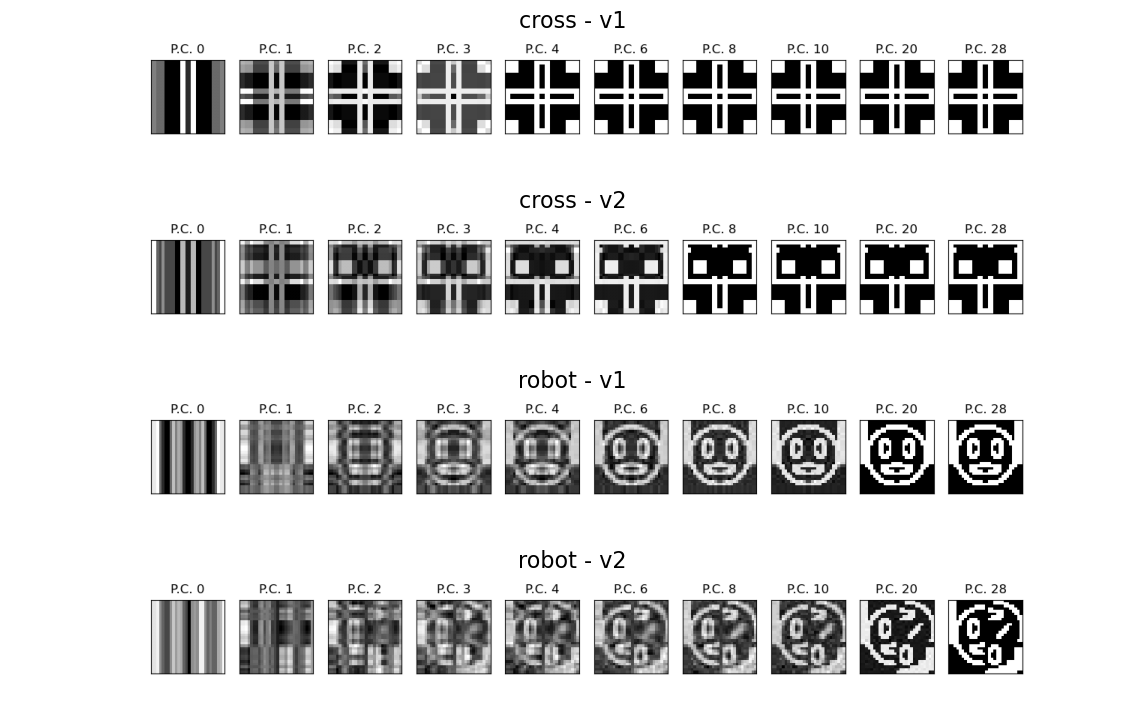

In [7]:
# Display selected principal components for image
from PIL import Image

# List of images to be decomposed via PCA
img_lst = [img_cross1, img_cross2, img_robot1, img_robot2]

# List of components to be visualized
pc_lst = [0,1,2,3,4,6,8,10,20,28]

# Create a list for Figure objects
figures = []

# Loop through the list of image names to create the figures and store them in a list 
for i,img in enumerate(img_lst):
    subfig, arr_pc = image_sum_components(img, pc_lst);
    figures.append(subfig)

# Initiate the final Figure object
fig = plt.figure(figsize=(16,6))
fig.tight_layout()

# Loop through the list of Figure objects and add them as subplots to the new figure object
for i, f in enumerate(figures):
    # Convert the Figure object to a PIL Image object
    img = f.savefig("temp.png")
    img = Image.open("temp.png")
    
    # Converts the subfigure to an np.array which can be handled by plt.add_subplot()    
    img = np.array(img).astype("uint8") / 255.0
    ax = fig.add_subplot(len(figures), 1, i+1)
    #ax.set_position([0.1+(i%2)*0.4, 0.5-(i//2)*0.4, 0.4, 0.4]) 
    ax.set_position([0.1, 0.3-(i*0.3), 0.9, 0.2])    
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(legend_lst[i], size=16);

    

It is interesting to note that the differences in the number of components required to explain any given % of variance is higher for **robot-v1** than for **cross-v2** despite all commonalities between them, including the fact that both images have a central vertical axis of symmetry. This suggests that symmetry in itself is not what truly matters. Let's have a look at two other very simple cases to explore this deeper.

Let us consider two images, called **vertical** and **diagonal**. These are symmetric displaying lines running vertically or diagonally as the names suggests. As before, we have a 28x28 matrix, and the number of ones and zeros is the same

(-0.5, 15.5)

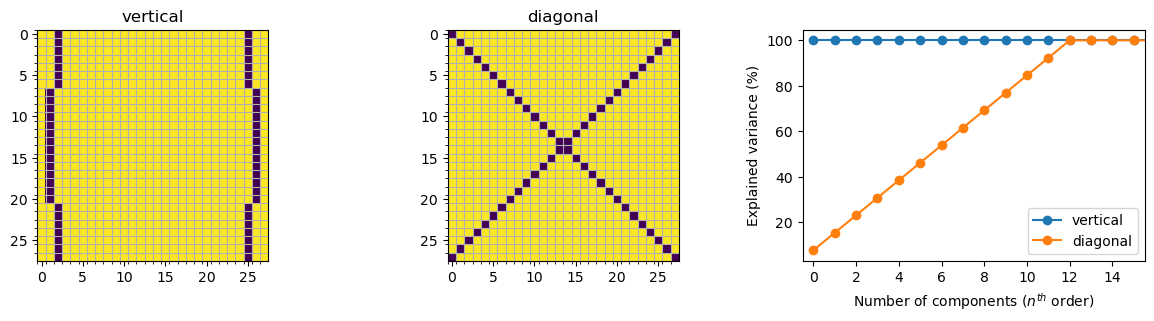

In [8]:
img_vertical = io.imread('images/vertical.png')/255
img_diagonal = io.imread('images/diagonal.png')/255

img_lst = [img_vertical, img_diagonal]
legend_img_lst = ["vertical", "diagonal"]

graph_lst = [img_vertical, img_diagonal]
graph_legend_lst =["vertical", "diagonal"]

fig, axes = plt.subplots(1,3,figsize=(15,3))
ax = axes.ravel()
#Visualize the transposed matrices
for i, img in enumerate(img_lst):    
    # Major ticks
    ax[i].set_xticks(np.arange(0, 27, 5))
    ax[i].set_yticks(np.arange(0, 27, 5))
    # Labels for major ticks
    ax[i].set_xticklabels(np.arange(0, 27, 5))
    ax[i].set_yticklabels(np.arange(0, 27, 5))
    # Minor ticks
    ax[i].set_xticks(np.arange(-.5, 27.5, 1), minor=True)
    ax[i].set_yticks(np.arange(-.5, 27.5, 1), minor=True)
    # Set grid
    ax[i].grid(True, which='minor')  
    # Set title  
    ax[i].set_title(legend_img_lst[i])
    # Plot array
    ax[i].imshow(img)

for i, img in enumerate(graph_lst):
    pca_line = pca_cumsum(img, 28)
    plt.plot(pca_line, 'o-')

ax[2].legend(graph_legend_lst)
ax[2].set_xlabel('Number of components ($n^{th}$ order)')
ax[2].set_ylabel('Explained variance (%)')
ax[2].set_xlim((-0.5,15.5))

In [9]:
pc_lst = np.arange(0,28,1)
img_lst = [img_vertical, img_diagonal]

for i,img in enumerate(img_lst):
    image_sum_components(img, pc_lst);

''

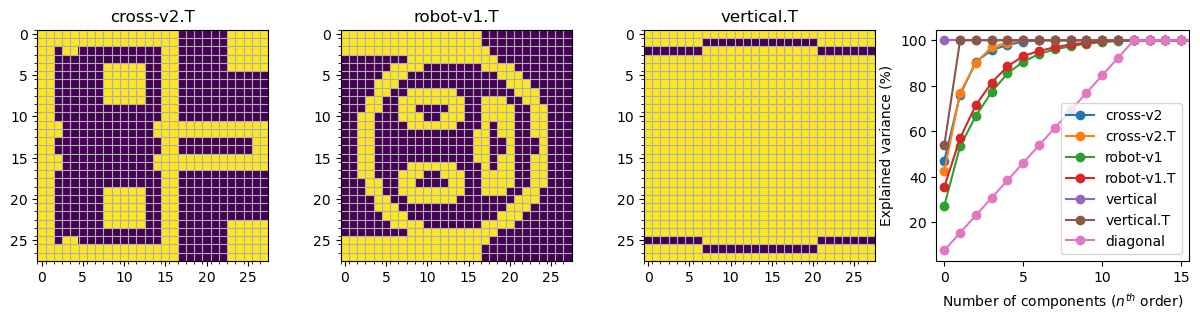

In [10]:
transpose_cross2 = img_cross2.T
transpose_robot1 = img_robot1.T
transpose_vertical = img_vertical.T

img_lst = [transpose_cross2, transpose_robot1,transpose_vertical]
legend_img_lst = ["cross-v2.T", "robot-v1.T", "vertical.T", "diagonal"]

graph_lst = [img_cross2, transpose_cross2, img_robot1, transpose_robot1, img_vertical, transpose_vertical, img_diagonal]
graph_legend_lst =["cross-v2", "cross-v2.T","robot-v1","robot-v1.T", "vertical", "vertical.T", "diagonal"]

fig, axes = plt.subplots(1,4,figsize=(15,3))
ax = axes.ravel()
#Visualize the transposed matrices
for i, img in enumerate(img_lst):    
    # Major ticks
    ax[i].set_xticks(np.arange(0, 27, 5))
    ax[i].set_yticks(np.arange(0, 27, 5))
    # Labels for major ticks
    ax[i].set_xticklabels(np.arange(0, 27, 5))
    ax[i].set_yticklabels(np.arange(0, 27, 5))
    # Minor ticks
    ax[i].set_xticks(np.arange(-.5, 27.5, 1), minor=True)
    ax[i].set_yticks(np.arange(-.5, 27.5, 1), minor=True)
    # Set grid
    ax[i].grid(True, which='minor')  
    # Set title  
    ax[i].set_title(legend_img_lst[i])
    # Plot array
    ax[i].imshow(img)

for i, img in enumerate(graph_lst):
    pca_line = pca_cumsum(img, 28)
    plt.plot(pca_line, 'o-')

ax[3].legend(graph_legend_lst)
ax[3].set_xlabel('Number of components ($n^{th}$ order)')
ax[3].set_ylabel('Explained variance (%)')
ax[3].set_xlim((-0.5,15.5))
;

Now that we have formed an idea about PCA, of how it decomposes an image into principal components, using binary images

In [11]:
from skimage.color import rgb2gray
#loads image
img_face = io.imread("images/original_image.jpg")
# defines the pixel lenght and width of the final (square) image
delta = 400
# Crops the image
img_face_color = img_face[250:250+delta,450:450+delta]
# converts from rgb color space to grayscale
img_face_bw = rgb2gray(img_face_color)

In [12]:
my_lst = np.arange(0,60,2)
fig, img_pc58 = image_sum_components(img_face_bw,my_lst);

In [13]:
img_face_bw.astype("uint8")
img_pc58.astype("uint8")

#io.imsave("img_face_bw.jpg",img_face_bw)
#io.imsave("img_face_pc58.jpg", img_pc58)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
img_face_bw

array([[0.96661843, 0.95288157, 0.93719529, ..., 0.92123412, 0.8383    ,
        0.88143725],
       [0.98734235, 0.98425412, 0.96464627, ..., 0.86156235, 0.8383    ,
        0.89320196],
       [0.97864314, 0.96771176, 0.95594706, ..., 0.92822902, 0.85006471,
        0.93633922],
       ...,
       [0.48684   , 0.50252627, 0.51429098, ..., 0.13418863, 0.16051647,
        0.1448302 ],
       [0.49860471, 0.49468314, 0.48684   , ..., 0.14203176, 0.12186627,
        0.15323882],
       [0.48600667, 0.4820851 , 0.47424196, ..., 0.13867569, 0.15716039,
        0.16108196]])

In [15]:
image_sum_components(np.asarray(mx),[0,1,2,3,4,5,6,7,9,10,11,12])

(<Figure size 1500x160 with 10 Axes>,
 array([[ 0.00000000e+00,  2.20498681e-16, -1.11022302e-16,
         -3.33066907e-16, -5.55111512e-17,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00, -2.44154983e-16,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  9.39360576e-18,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  9.39360576e-18,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  9.39360576e-18,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00, -2.44154983e-16,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  2.20498681e-16, -1.11022302e-16,
         -3.33066907

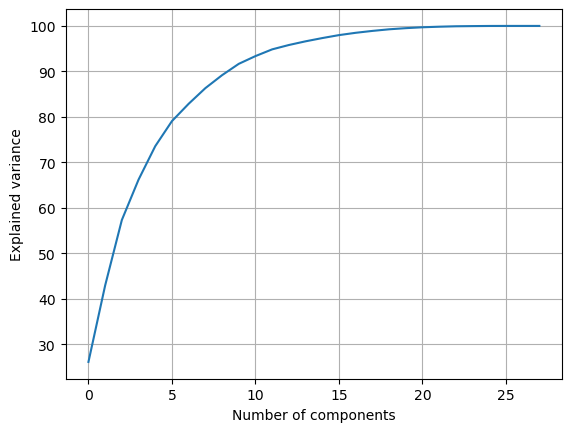

In [16]:
import numpy as np
from sklearn.decomposition import PCA
pca_28 = PCA(n_components=28)
pca_28.fit(img_robot2)

plt.grid()
plt.plot(np.cumsum(pca_28.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

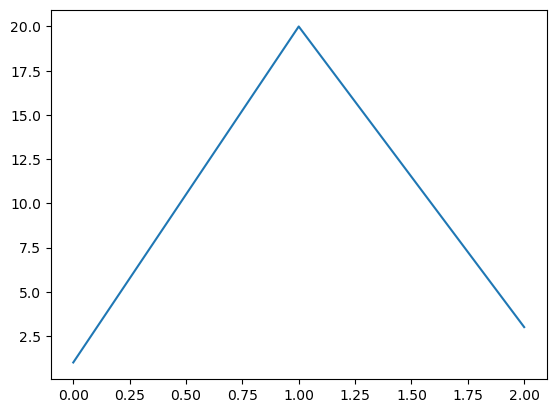

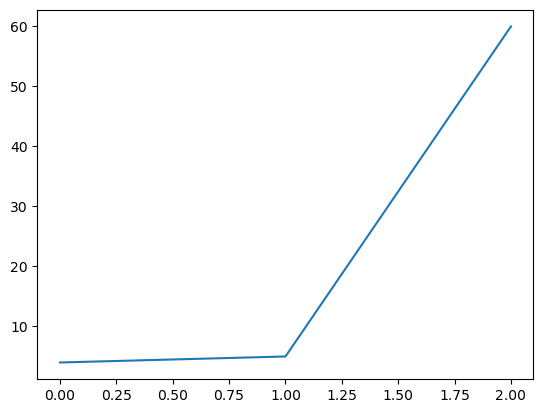

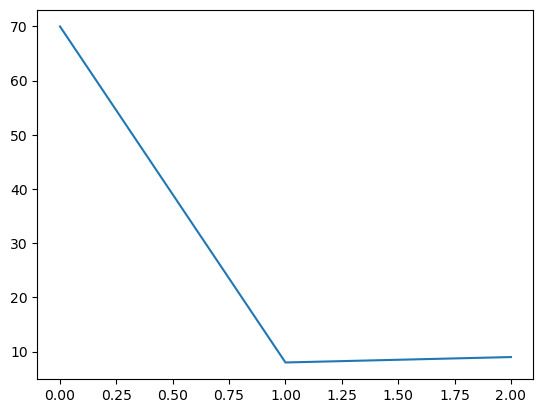

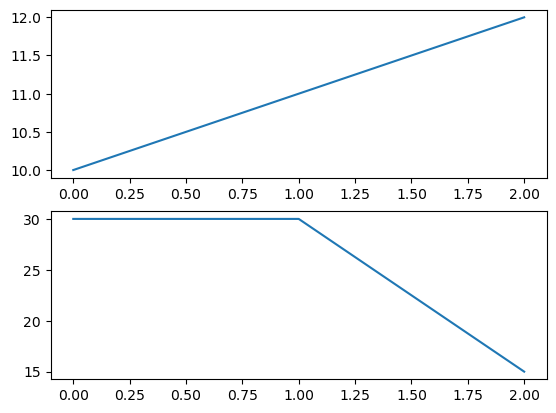

In [17]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot([1, 20, 3])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot([4, 5, 60])

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot([70, 8, 9])

fig4 = plt.figure()
ax4 = fig4.add_subplot(211)
ax4.plot([10, 11, 12])

ax5 = fig4.add_subplot(212)
ax5.plot([30, 30, 15])

plt.show()